In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [2]:
df = pd.read_csv('job_placement_dataset.csv')

In [3]:
print(df.head())
print(df.info())
print(df.isna().sum())

   age  education_level  years_of_experience  skills_score  interview_score  \
0   24                2                   13            91               90   
1   32                2                   10            33               46   
2   28                2                   10            71               86   
3   25                1                   15            47               84   
4   24                4                   10            69               76   

   certifications  job_offer  
0               0          1  
1               3          1  
2               5          1  
3               5          1  
4               4          1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  300 non-null    int64
 1   education_level      300 non-null    int64
 2   years_of_experience  300 non-null    i

In [5]:
df.columns

Index(['age', 'education_level', 'years_of_experience', 'skills_score',
       'interview_score', 'certifications', 'job_offer'],
      dtype='object')

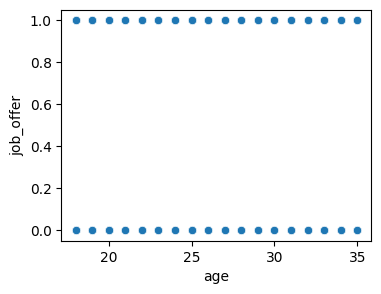

In [6]:
#visualization
plt.figure(figsize=(4,3))
sns.scatterplot(x='age', y='job_offer', data=df)
plt.show()

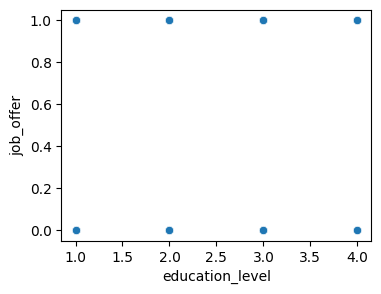

In [7]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='education_level', y='job_offer', data=df)
plt.show()

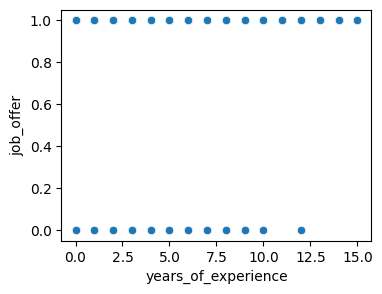

In [8]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='years_of_experience', y='job_offer', data=df)
plt.show()

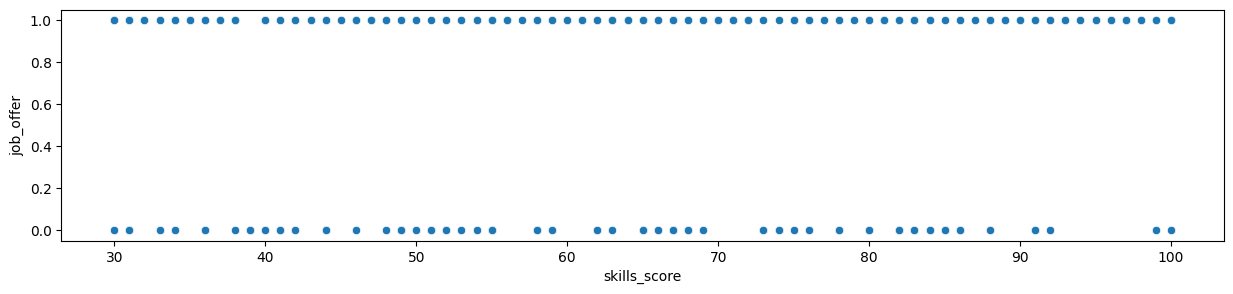

In [12]:
plt.figure(figsize=(15,3))
sns.scatterplot(x='skills_score', y='job_offer', data=df)
plt.show()

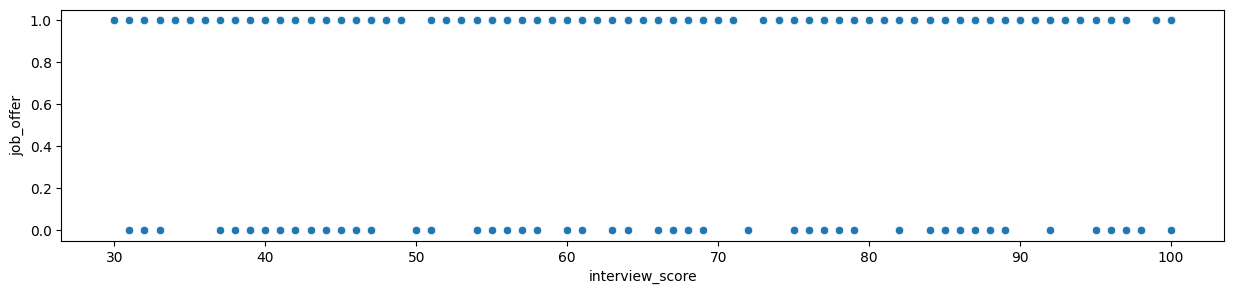

In [13]:
plt.figure(figsize=(15,3))
sns.scatterplot(x='interview_score', y='job_offer', data=df)
plt.show()

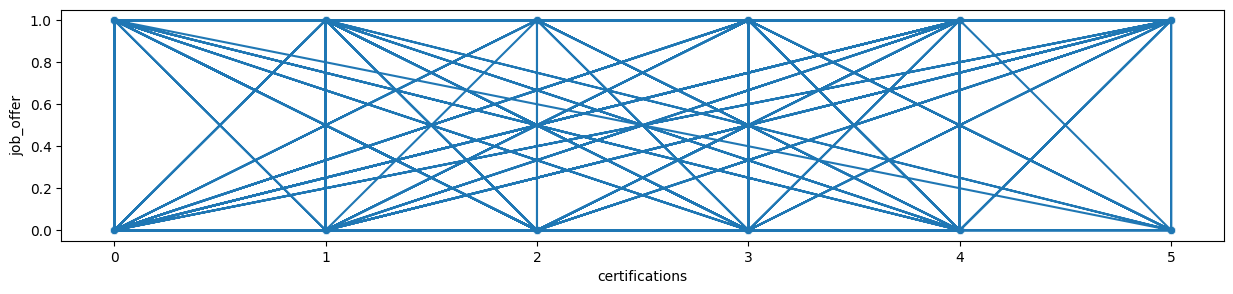

In [17]:
plt.figure(figsize=(15,3))
sns.scatterplot(x='certifications', y='job_offer', data=df)
plt.plot(df['certifications'], df['job_offer'])
plt.show()

<Axes: xlabel='job_offer'>

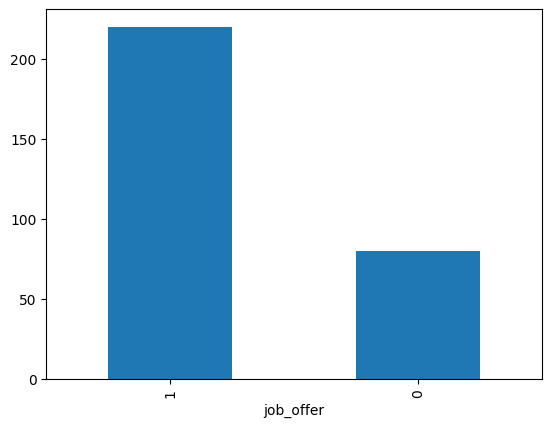

In [19]:
df['job_offer'].value_counts().plot(kind='bar')

In [20]:
df.columns

Index(['age', 'education_level', 'years_of_experience', 'skills_score',
       'interview_score', 'certifications', 'job_offer'],
      dtype='object')

In [21]:
#feature & target
x = df[['age', 'education_level', 'years_of_experience', 'skills_score',
       'interview_score', 'certifications']]
y = df[['job_offer']]

In [34]:
# train test split
xtrain, xtest, ytrain ,ytest = train_test_split(x, y, test_size=0.3, random_state=42)

In [35]:
xtrain.head()

,age,education_level,years_of_experience,skills_score,interview_score,certifications
194,24,2,5,36,68,4
101,31,2,12,82,91,5
68,30,2,3,52,85,0
224,20,3,13,95,93,4
37,25,1,12,62,89,1


In [36]:
ytrain.head()

,job_offer
194,1
101,1
68,0
224,1
37,1


In [37]:
xtest.head()

,age,education_level,years_of_experience,skills_score,interview_score,certifications
203,22,3,14,30,99,5
266,20,3,11,69,90,4
152,34,2,10,48,77,1
9,20,2,6,67,99,0
233,25,3,10,47,35,2


In [38]:
ytest.head()

,job_offer
203,1
266,1
152,1
9,1
233,1


In [39]:
#model implementation
logi = LogisticRegression(random_state=42)

In [40]:
model = logi.fit(xtrain, ytrain)
model

c:\Users\MD Maruf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [41]:
model.score(xtrain, ytrain)

0.8095238095238095

In [42]:
model.score(xtest, ytest)

0.8222222222222222

In [44]:
pred_y = model.predict(xtest)
pred_y

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1])

In [47]:
pred_y_prob = model.predict_proba(xtest)[:, 1]

In [50]:
cl_r = classification_report(ytest, pred_y)
print("classification report:\n", cl_r)

classification report:
               precision    recall  f1-score   support

           0       0.47      0.60      0.53        15
           1       0.92      0.87      0.89        75

    accuracy                           0.82        90
   macro avg       0.69      0.73      0.71        90
weighted avg       0.84      0.82      0.83        90



In [51]:
print("Confussion:\n", confusion_matrix(ytest, pred_y))

Confussion:
 [[ 9  6]
 [10 65]]


In [52]:
print("ROC AUR score:\n", roc_auc_score(ytest, pred_y))

ROC AUR score:
 0.7333333333333333


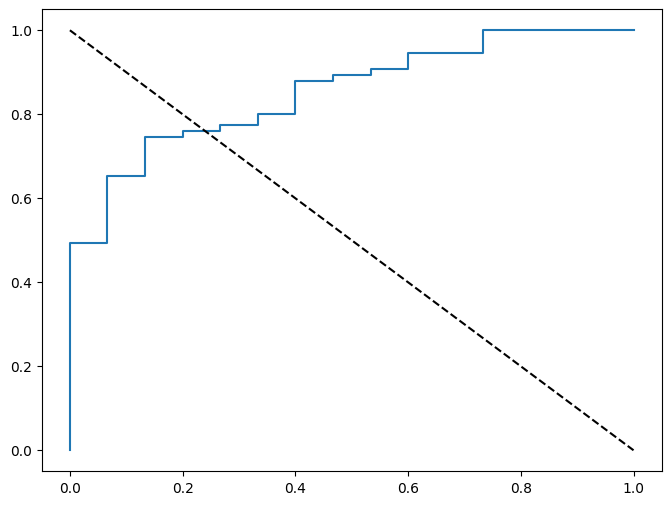

In [55]:
fpr, tpr, thresholds = roc_curve(ytest, pred_y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr)
plt.plot([0,1],[1,0], 'k--')
plt.show()

In [58]:
coe = model.coef_[0]
coe

array([-0.03459887,  0.38041597,  0.3830327 ,  0.00698349, -0.00081045,
        0.22366032])